# Baywheels Data Exploration and Visualization
## by Prerna Bhand

## Preliminary Wrangling

The BayWheels Dataset (Formerly called as Ford GoBike Dataset) is a collection of trips from various drivers from several years. In this report, 2020 data has been taken.
The aim of this project is to explore and gain insights of the data as well as provide visualizations for clear understaing of the trends and insights.

Each trip is anonymized and includes:

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

## Following questions are interesting to explore


1- What's the demographic of users?
2 -What's the most popular station to pick up and return the bike?
3- What's the use pattern of rides.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Data Wrangling
### Gather the data from 12 different csv for each month into a single master. 



In [2]:
## Do not run this code all the time. This code must be run once to generate a master csv for the chosen year 
## that is 2019 

strPath = os.getcwd()
files = [f for f in os.listdir(strPath) if re.match(r'[0-9]+.*\.csv', f)]

df= pd.DataFrame()

for file in files:
    a=pd.read_csv(file, )
    df=df.append(a)

# Reset index
df1=df.reset_index(drop=True)

df1.to_csv('BayWheels_2019.csv', index=False)

/Applications/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Applications/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Applications/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.read_csv('BayWheels_2019.csv', low_memory = False)

In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')

In [8]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN
5,8648,2019-09-30 21:43:51.0140,2019-10-01 00:07:59.8930,11.0,Davis St at Jackson St,37.797280,-122.398436,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,9806,Customer,No,NaN
6,644,2019-09-30 23:54:43.1040,2019-10-01 00:05:27.6560,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,91.0,Berry St at King St,37.771762,-122.398438,9963,Subscriber,No,NaN
7,459,2019-09-30 23:54:42.8650,2019-10-01 00:02:22.3630,321.0,5th St at Folsom,37.780146,-122.403071,77.0,11th St at Natoma St,37.773507,-122.416040,531,Subscriber,No,NaN
8,625,2019-09-30 23:49:31.7050,2019-09-30 23:59:56.9160,16.0,Steuart St at Market St,37.794130,-122.394430,80.0,Townsend St at 5th St,37.775235,-122.397437,10906,Subscriber,No,NaN
9,1177,2019-09-30 23:39:34.0880,2019-09-30 23:59:11.2090,433.0,Gennessee St at Monterey Blvd,37.731657,-122.451122,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,11058,Customer,No,NaN


In [9]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object

In [7]:
df.shape

(2506983, 15)

### What is the structure of your dataset?

The dataset contains 15 columns and 2506983 rows. The columns contain start time, end time of the ride, bike identification, coordinates of the start and end stations. There are two more columns bike_share_for_all_trip and rental_access_method (todo)

### What is/are the main feature(s) of interest in your dataset?

The dataset contains bike trip data between specific stations and there duration. Feature of interest in this dataset is to find out what are the most popular stations where bikes were picked or dropped off, what was the busiest time and what was relatively free time, user types - whether being a member or new had any impact on the rides etc. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The user_type to understand memberships, the duration and timings, and the start and end location coordinates will help investigate our features of interest in the dataset

## Data Cleaning

** In below few cells, the data set is cleaned up for better analysis** 

In [13]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
bike_share_for_all_trip     True
rental_access_method        True
dtype: bool

** From visual observation, following few points need attention**
1. Duration in Seconds can be converted to minutes
2. Start time and end time have string data type should be converted to DateTime
3. bike_share_for_all_trips seems to be irrelevant and could be deleted

In [14]:
# 3. Delete bike_share_for_all_trip column
df.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

In [16]:
#2. Change data type of star_time and end_time
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

In [17]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
rental_access_method               object
dtype: object

In [19]:
# 1. Convert duration_sec into minutes, also change column name to reflect that

df['duration_mins']=df['duration_sec']/60
df.duration_mins=df.duration_mins.astype(int)


In [20]:
# delete duration_sec column
df.drop(['duration_sec'], axis=1, inplace=True)

In [21]:
df.head(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_mins
0,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,NaN,1014
1,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,NaN,600
2,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,NaN,93
3,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,NaN,24
4,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,NaN,21


In [50]:
# 2. Create day, day of week, month columns from Start time and end time
dates = pd.to_datetime(df['start_time'])
df['day_start'] = dates.dt.day
df['dayofweek_start'] = dates.dt.dayofweek
df['month_start'] = dates.dt.month

In [51]:
dates_end = pd.to_datetime(df['end_time'])
df['day_end'] = dates_end.dt.day
df['dayofweek_end'] = dates_end.dt.dayofweek
df['month_end'] = dates_end.dt.month

**The days of week are in numbers, converting them to text**

In [54]:
df.dayofweek_start.value_counts()

Tuesday      4179
Monday       4019
Friday       3595
Wednesday    3278
Thursday     2812
Saturday     2225
Sunday       1751
Name: dayofweek_start, dtype: int64

In [52]:
mapper = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['dayofweek_start'] = df['dayofweek_start'].map(mapper)
df['dayofweek_end'] = df['dayofweek_end'].map(mapper)

In [53]:
print(df.dayofweek_start.unique())

print(df.dayofweek_end.unique())

['Thursday' 'Saturday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Monday']
['Thursday' 'Saturday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Monday']


In [56]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

In [57]:

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_end'] = df['dayofweek_end'].astype(ordered_cat)

In [22]:
# drop null values

df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21859 entries, 627648 to 2067178
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   start_time               21859 non-null  datetime64[ns]
 1   end_time                 21859 non-null  datetime64[ns]
 2   start_station_id         21859 non-null  float64       
 3   start_station_name       21859 non-null  object        
 4   start_station_latitude   21859 non-null  float64       
 5   start_station_longitude  21859 non-null  float64       
 6   end_station_id           21859 non-null  float64       
 7   end_station_name         21859 non-null  object        
 8   end_station_latitude     21859 non-null  float64       
 9   end_station_longitude    21859 non-null  float64       
 10  bike_id                  21859 non-null  int64         
 11  user_type                21859 non-null  object        
 12  rental_access_method     

In [58]:
df.to_csv('clean_baywheel.csv', index = False)

** This completed data cleaning process**

# Data Exploration and Visualization

## Univariate Exploration

### This section will try to investigate single variables and their impact

### Univariate Exploration #1:
#### What are most and least common start stations


In [28]:
df.head(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_mins
627648,2019-07-04 14:31:11,2019-07-04 14:42:20,425.0,Bird Ave at Willow St,37.311284,-121.896325,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,630873,Customer,app,11
627649,2019-07-04 20:27:35,2019-07-04 20:31:36,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,892319,Customer,app,4
627651,2019-07-04 13:22:24,2019-07-04 13:33:27,425.0,Bird Ave at Willow St,37.311284,-121.896325,296.0,5th St at Virginia St,37.325998,-121.877120,656863,Subscriber,app,11
627654,2019-07-04 12:14:14,2019-07-04 12:41:29,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,892319,Customer,app,27
627655,2019-07-13 15:24:46,2019-07-13 15:35:06,425.0,Bird Ave at Willow St,37.311284,-121.896325,312.0,San Jose Diridon Station,37.329732,-121.901782,664682,Customer,app,10


In [30]:
df['start_station_name'].value_counts().head(5)

5th St at Virginia St                                        756
Berry St at 4th St                                           524
San Francisco Caltrain Station 2  (Townsend St at 4th St)    471
San Jose Diridon Station                                     440
San Francisco Ferry Building (Harry Bridges Plaza)           420
Name: start_station_name, dtype: int64

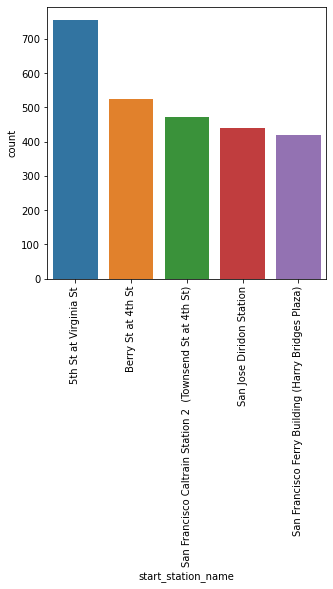

In [47]:
plt.figure(figsize=[5,5])

plt.xticks(ticks=[0,1],labels=['Station Name', 'Count of rides'], rotation = 90);

plot = sb.countplot(x=df.start_station_name, order=df.start_station_name.value_counts().iloc[:5].index)



### Univariate Exploration #2:
#### What are most and least common end stations

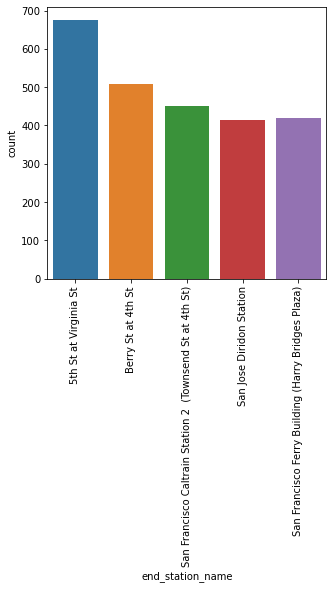

In [48]:
plt.figure(figsize=[5,5])

plt.xticks(ticks=[0,1],labels=['Station Name', 'Count of rides'], rotation = 90);

plot = sb.countplot(x=df.end_station_name, order=df.start_station_name.value_counts().iloc[:5].index)


In [31]:
df['end_station_name'].value_counts().head(5)

5th St at Virginia St                                        676
Berry St at 4th St                                           509
San Francisco Caltrain Station 2  (Townsend St at 4th St)    450
San Francisco Ferry Building (Harry Bridges Plaza)           419
San Jose Diridon Station                                     413
Name: end_station_name, dtype: int64

Text(0, 0.5, 'Count')

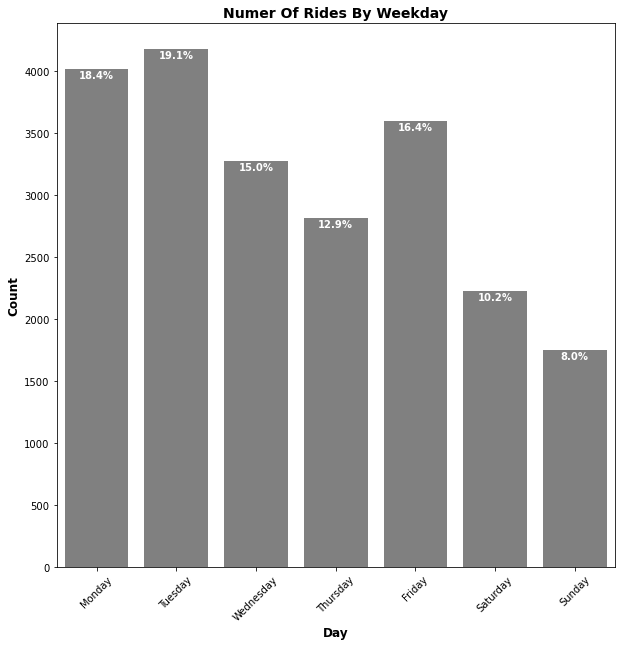

In [62]:
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[1]

#--Defining the graph
sb.countplot(data = df, x='dayofweek_start', color = 'grey')


n_points = df.shape[0]
cat_counts = df['dayofweek_start'].value_counts()
locs, labels = plt.xticks(rotation = 45)

#--Setting the percentage
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy')
    
# Add title and format it
plt.title('Numer of rides by weekday'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count'.title(),
               fontsize = 12, weight = "bold")

This graph makes show us that the weekdays that have more rides are: Tuesday, Wednesday and Thursday. What has had surprised me was the number of rides on weekends. I thought that most of the rides were made on weekends when people had more time to enjoy their free time. Two things come up: maybe people stay more time with bicycles on the weekend than on weekdays because they use it for leisure time and on the weekdays they use it for transportation, more quickly and in a functional way. So it can be a different habit by day use. By now we have answered our first question, but new's ones has come up!



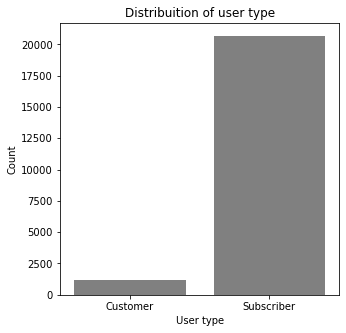

In [66]:
plt.figure(figsize=[5, 5])
#--Defining the graph
sb.countplot(data = df, x='user_type', color = 'grey');
plt.title("Distribuition of user type")
plt.xlabel("User type")
plt.ylabel("Count");

In [68]:
#--Looking for log informatiton to scale (duration) in the next graph
np.log10(df.duration_mins.describe())

count    4.339630
mean     1.043024
std      1.020303
min      0.000000
25%      0.698970
50%      0.903090
75%      1.113943
max      2.419956
Name: duration_mins, dtype: float64

Text(0, 0.5, 'Count Of Rides')

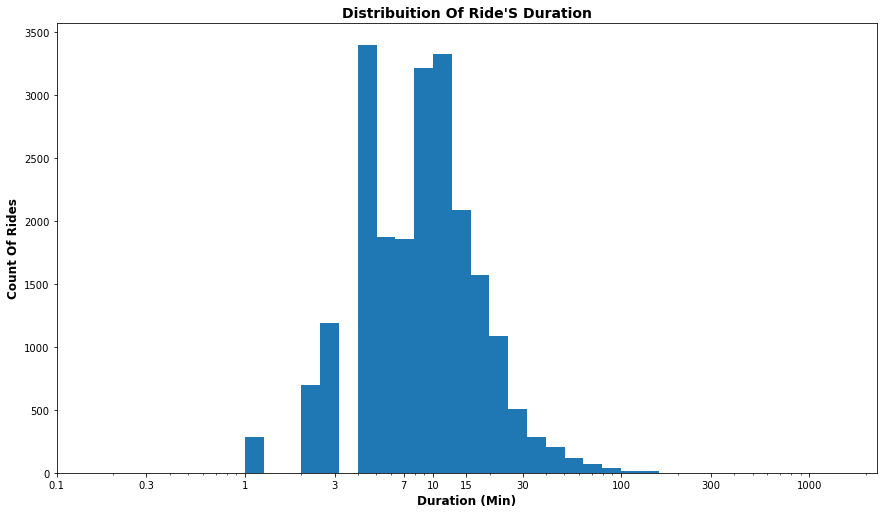

In [71]:
#--Plotting a distribuition with log scale x ticks
plt.figure(figsize=[14.70, 8.27])
bins = 10 ** np.arange(0,3.15+0.1,0.1)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x = 'duration_mins', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

# Add title and format it
plt.title("Distribuition of ride's duration".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Duration (min)'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count of rides'.title(),
               fontsize = 12, weight = "bold")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


**In this first graph, there is the relation between ride's duration and weekdays, as well the answer for the second question:

2. How long does the average trips takes? Does it changes over the weekday?**

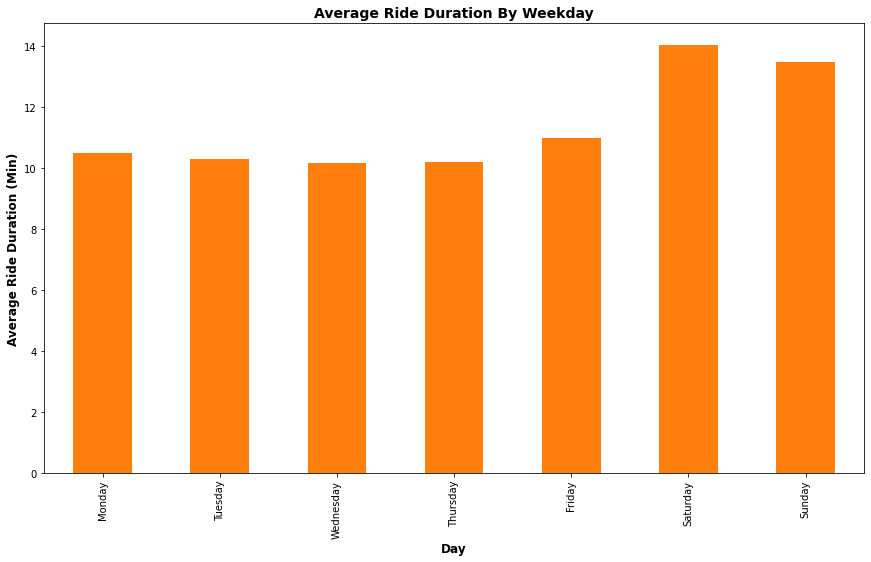

In [73]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]
df.groupby('dayofweek_start')['duration_mins'].mean().plot(kind = "bar", color = base_color);

# Add title and format it
plt.title("Average ride duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Average ride duration (min)'.title(),
               fontsize = 12, weight = "bold");

In [75]:
print(df.groupby('dayofweek_start')['duration_mins'].mean())

dayofweek_start
Monday       10.483205
Tuesday      10.300550
Wednesday    10.142770
Thursday     10.183855
Friday       10.981641
Saturday     14.032360
Sunday       13.472302
Name: duration_mins, dtype: float64


**Violin Visualization**

In [78]:
#--As the duration time of rides are widely, I choose to do these two subcut in the df 
#--in order to have a better visualization

df_durationsub_100 = df.loc[df['duration_mins'] <= 100]
df_durationsub_45 = df.loc[df['duration_mins'] <= 45]

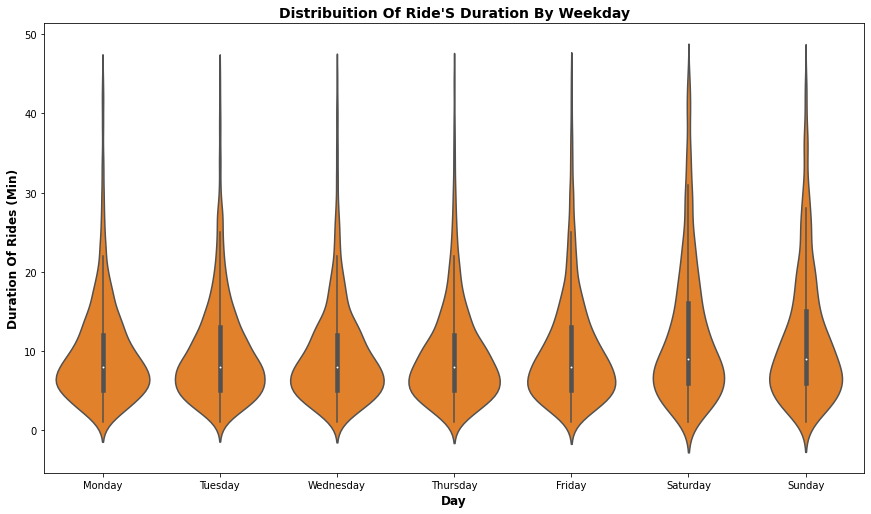

In [80]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[1]

#--Plotting the graph
sb.violinplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_mins',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

## BoxPlot Visualization

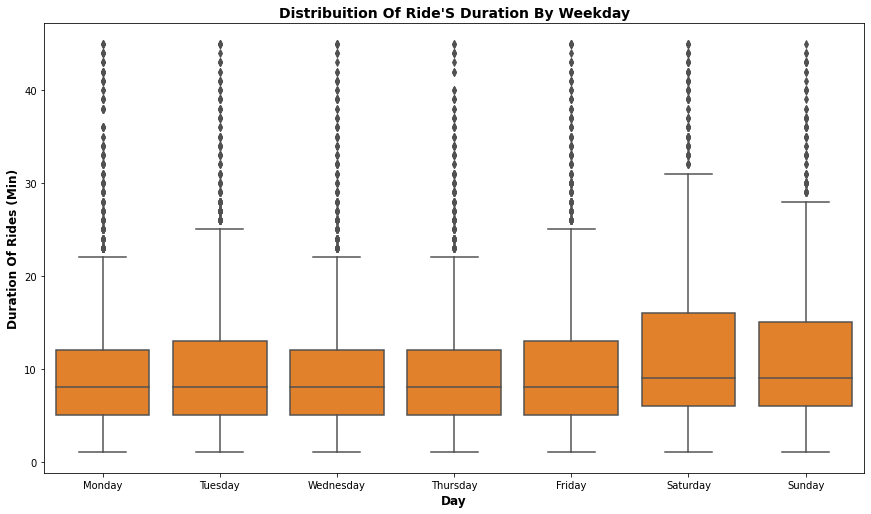

In [82]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.boxplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_mins',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

## Does the above depend on if a user is a subscriber or a customer?¶

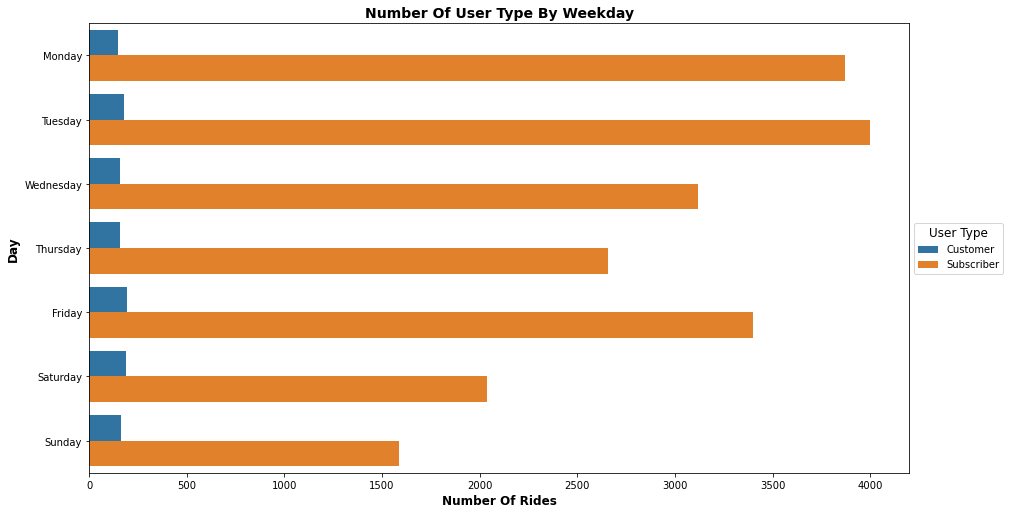

In [83]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = df, y='dayofweek_start', hue = 'user_type');


# Add title and format it
plt.title("Number of user type by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Number of rides'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

In [85]:
#--Average ride's duration by weekday and user
print(df.groupby(by = ['user_type','dayofweek_start'])['duration_mins'].mean())


user_type   dayofweek_start
Customer    Monday             21.727891
            Tuesday            17.301676
            Wednesday          21.169811
            Thursday           19.423077
            Friday             19.536082
            Saturday           28.978723
            Sunday             22.151515
Subscriber  Monday             10.056302
            Tuesday             9.987250
            Wednesday           9.580635
            Thursday            9.641190
            Friday             10.493678
            Saturday           12.652921
            Sunday             12.569357
Name: duration_mins, dtype: float64


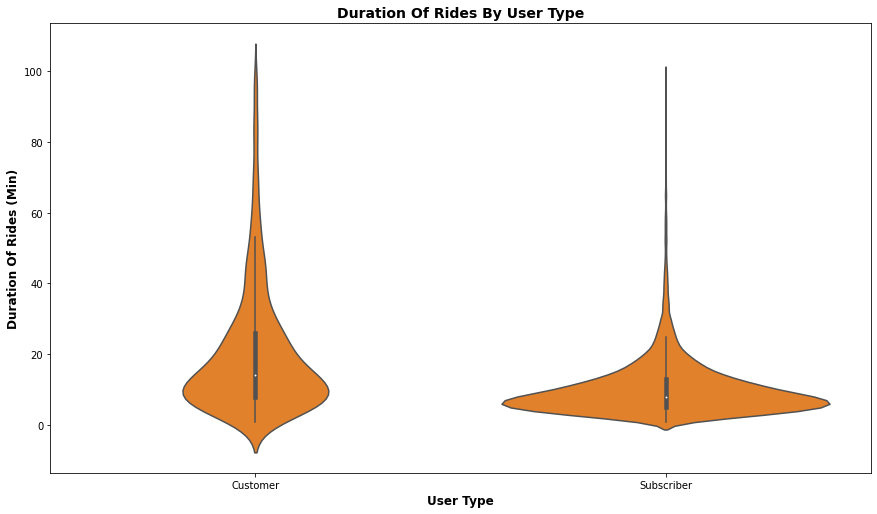

In [87]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.violinplot(data = df_durationsub_100, x = 'user_type', y = 'duration_mins',
              color = base_color)

# Add title and format it
plt.title("Duration of Rides by User Type".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

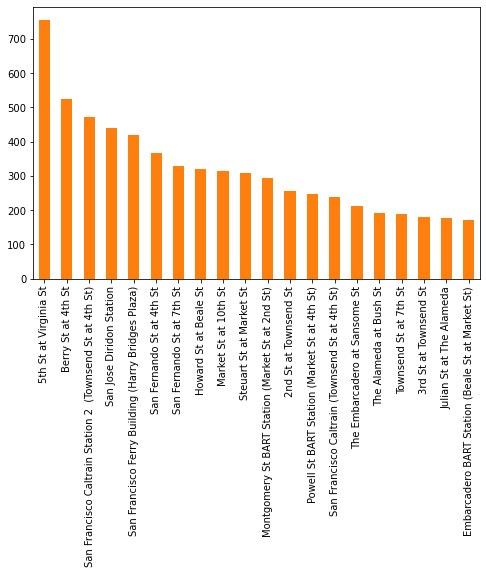

In [88]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

df['start_station_name'].value_counts().head(20).plot(kind='bar', color = base_color);

In [90]:
plt.figure(figsize = (8,8))
threshold = 5557 # Frequency of the 20th station 
make_frequency = df['start_station_name'].value_counts()
idx = np.sum(make_frequency > threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['start_station_name'].isin(most_makes)]

make_means = df_sub.groupby('start_station_name').mean()
comb_order = make_means.sort_values('duration_mins', ascending = False).index

base_color = sb.color_palette()[0]
sb.barplot(data = df_sub, x = 'duration_mins', y = 'start_station_name', 
           color = base_color, order = comb_order)
plt.xlabel("Duration's ride (min)")
plt.ylabel(" ")

plt.title("Average Combined Duration Rides");

ValueError: min() arg is an empty sequence

<Figure size 576x576 with 0 Axes>

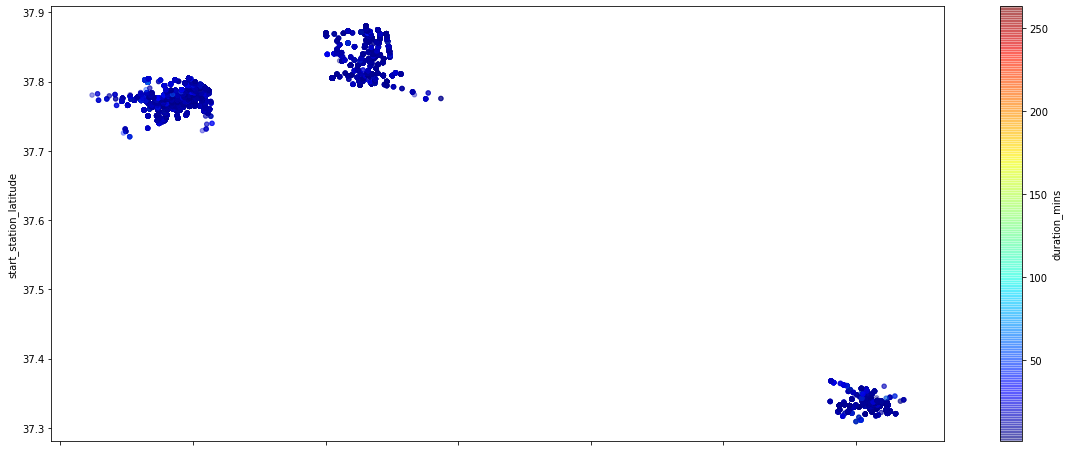

In [91]:
#--Setting a scatter plot to observe geografic location
_ = df.plot(kind = 'scatter', x = 'start_station_longitude', y = 'start_station_latitude', 
        c= 'duration_mins', cmap = plt.get_cmap("jet"), colorbar = True,
        alpha = 0.4, figsize =(20,8));

plt.xlabel("Start Station Longitude")
plt.show()

## Multivariate Exploration
** On this last part of exploration, we'll be plotting relationship visualization attempting to finally verify the relation between the features: user type, weekday and duration of rides. In order to, trace the different behaviour habits to these two type of users.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

/Applications/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


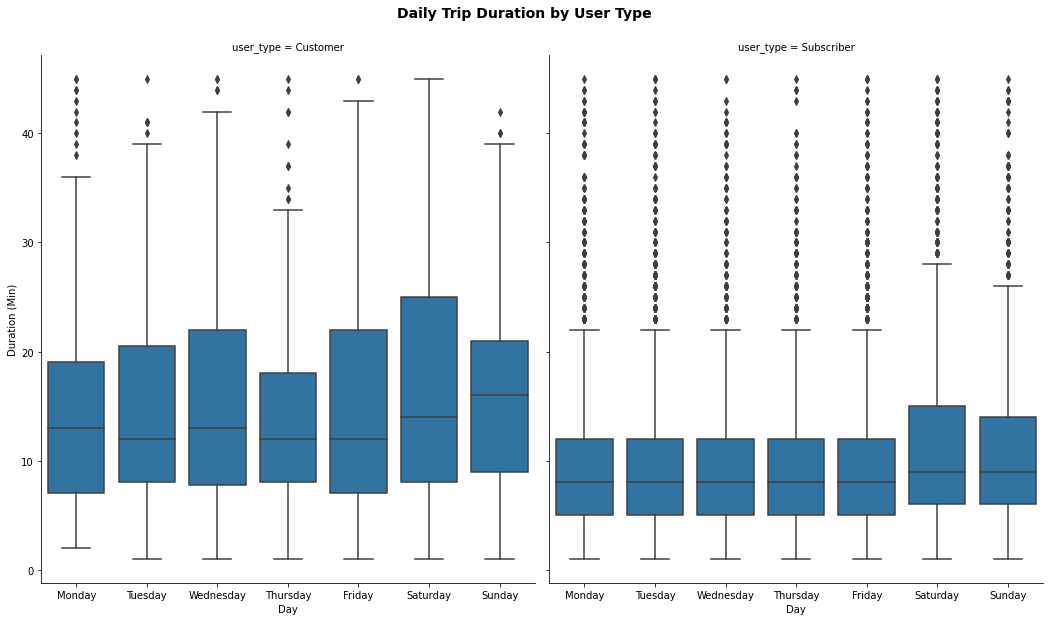

In [93]:
g = sb.FacetGrid(data = df_durationsub_45, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'dayofweek_start', 'duration_mins');

plt.suptitle("Daily Trip Duration by User Type", y = 1.04, fontsize = 14, weight = 'bold')

g.set_axis_labels('Day', 'Duration (Min)');

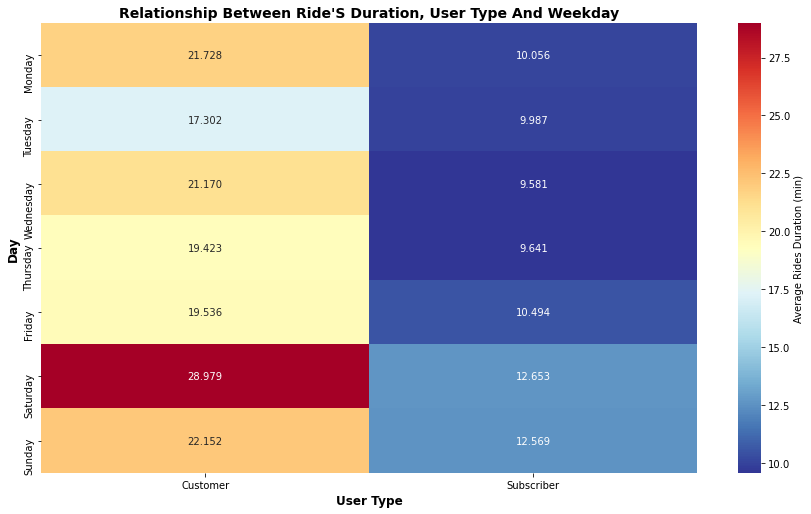

In [94]:
plt.figure(figsize=[14.70, 8.27])

#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
cat_means = df.groupby(['user_type','dayofweek_start']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'dayofweek_start', columns = 'user_type', 
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'RdYlBu_r')


# Add title and format it
plt.title("Relationship between ride's duration, user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

Conclusion
Finally, in this Multivariate Visualization, we could put together: user type, duration of rides and weekdays. And now it's possible to affirm that customer and subscribers have very different behaviour. Subscribers use the Bay Wheels more frequently and on a weekday, it's part of his mobility journey and rides are faster. As for customers, they use Bay Wheels's bikes on the weekend, stays more time with it and use it to enjoy their free time.

So by analyzing this dataset, we were able to find out two very different groups of users, which have distinct behaviour and needs. Bay Wheels should understand both of their user types and base their strategical decisions to fully attend their needs